In [1]:
import os


# in case we're running on colab the code won't be available
# so we check it out
if not os.path.exists("maws"):
    os.system("git clone https://github.com/facebookresearch/maws")
    os.chdir("maws")
    %pip install timm

# Instantiating the model

In [2]:
from maws.model_builder import build_model
from maws.utils import start_inference_mode, predict_probs_and_plot

In [3]:
start_inference_mode(device="cpu")

In [4]:
# create a base model, fastest to run but least accurate
clip_model = build_model("vit_b16_xlmr_b", "maws_clip")

# create a larger but slower models
# clip_model = build_model("vit_l16_xlmr_l", "maws_clip")
# clip_model = build_model("vit_h14_xlmr_l", "maws_clip")
# clip_model = build_model("vit_2b14_xlmr_l", "maws_clip")

_ = clip_model.eval()

# Example: Multi-lingual support

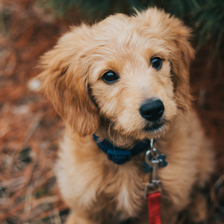

In [5]:
image_path = (
    "https://images.pexels.com/photos/3397939/pexels-photo-3397939.jpeg"
    # "https://images.pexels.com/photos/3608263/pexels-photo-3608263.jpeg"
    # "https://images.pexels.com/photos/11873002/pexels-photo-11873002.jpeg"
    # "https://images.pexels.com/photos/70955/pexels-photo-70955.jpeg"
)
display(clip_model.get_cropped_images(image_path))

/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


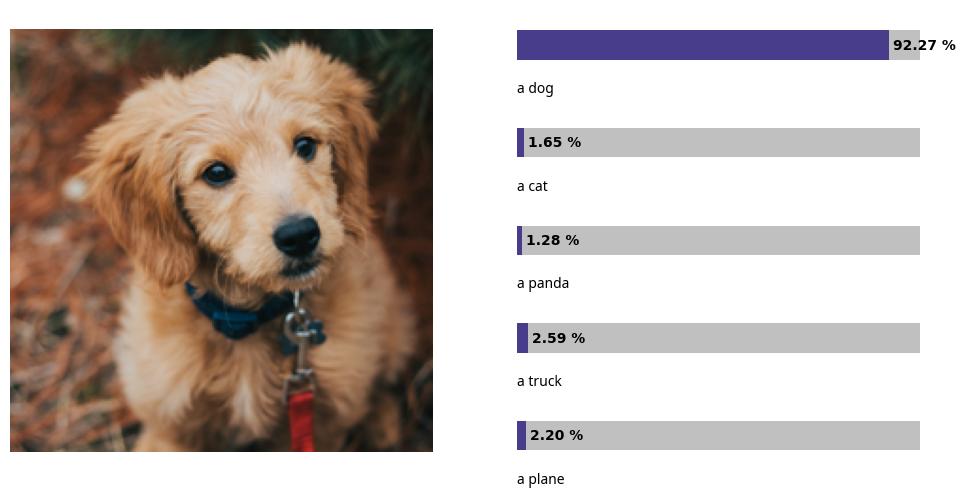

In [6]:
# English
texts = [
    "a dog",
    "a cat",
    "a panda",
    "a truck",
    "a plane",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

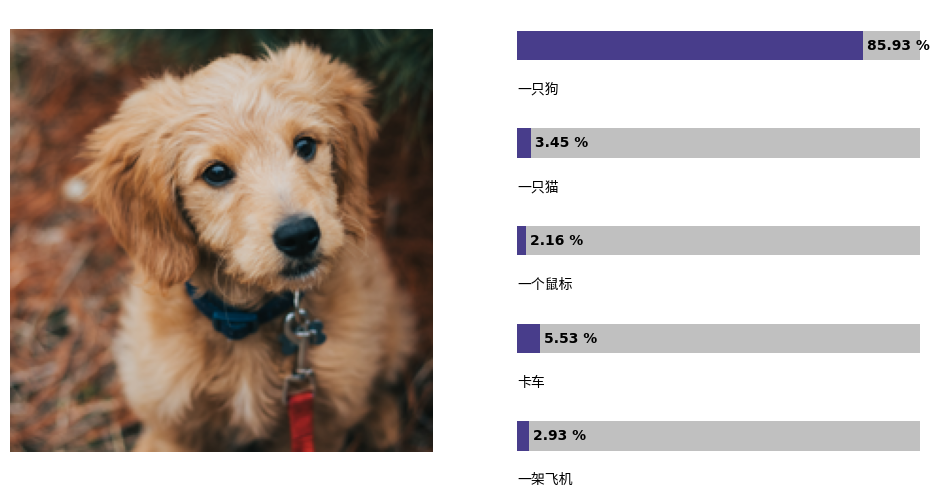

In [7]:
# Chinese (simplified)
texts = [
    "一只狗",
    "一只猫",
    "一个鼠标",
    "卡车",
    "一架飞机",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="cjk")

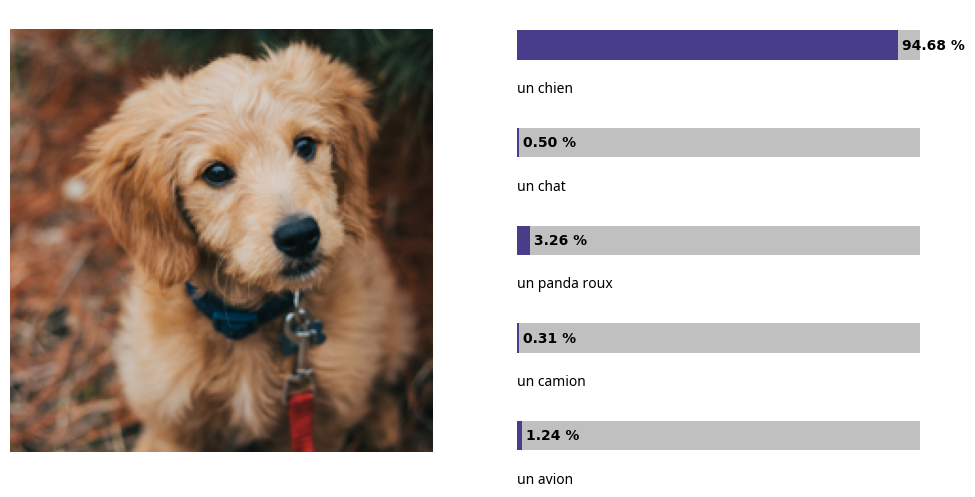

In [8]:
# French
texts = [
    "un chien",
    "un chat",
    "un panda roux",
    "un camion",
    "un avion",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


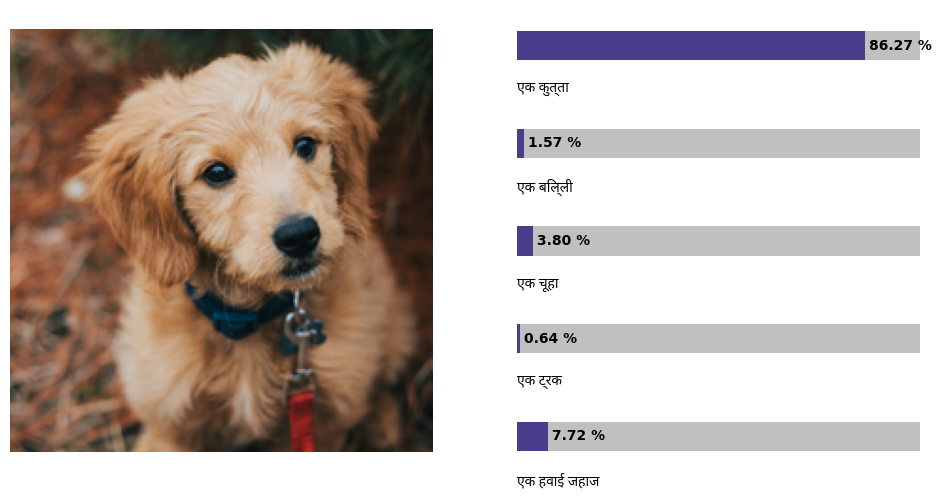

In [9]:
# Hindi
texts = [
    "एक कुत्ता",
    "एक बिल्ली",
    "एक चूहा",
    "एक ट्रक",
    "एक हवाई जहाज",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="devanagari")

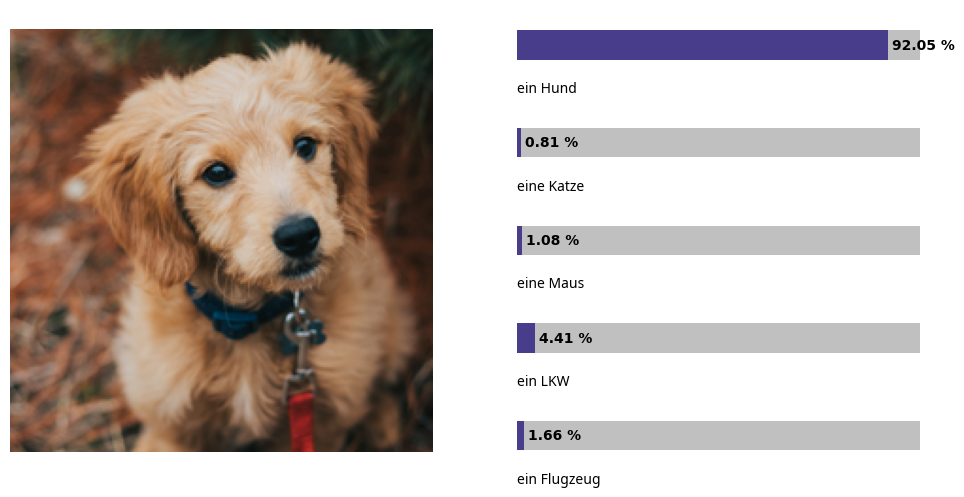

In [10]:
# German
texts = [
    "ein Hund",
    "eine Katze",
    "eine Maus",
    "ein LKW",
    "ein Flugzeug",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

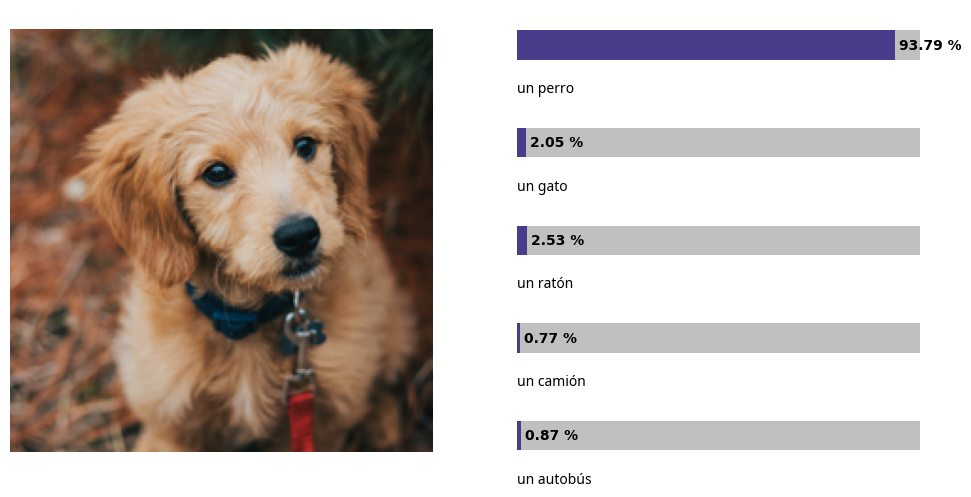

In [11]:
# Spanish
texts = [
    "un perro",
    "un gato",
    "un ratón",
    "un camión",
    "un autobús",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

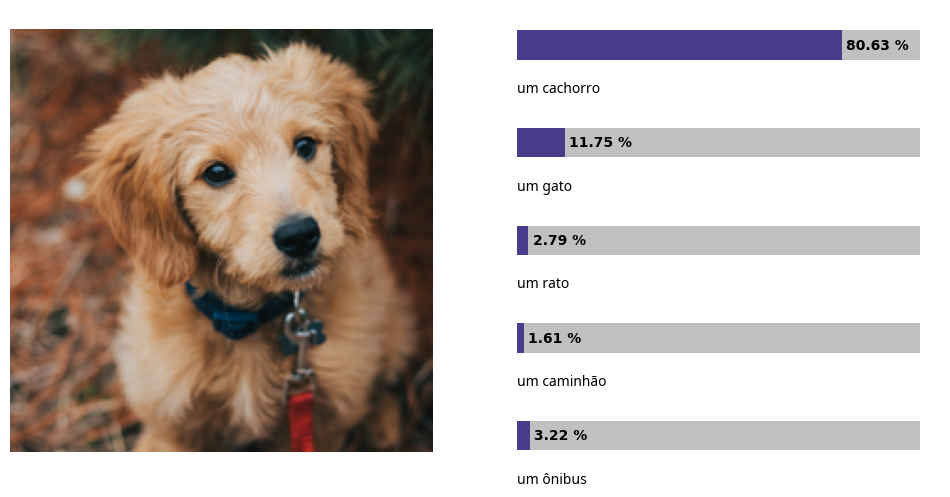

In [12]:
# Portuguese
texts = [
    "um cachorro",
    "um gato",
    "um rato",
    "um caminhão",
    "um ônibus",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

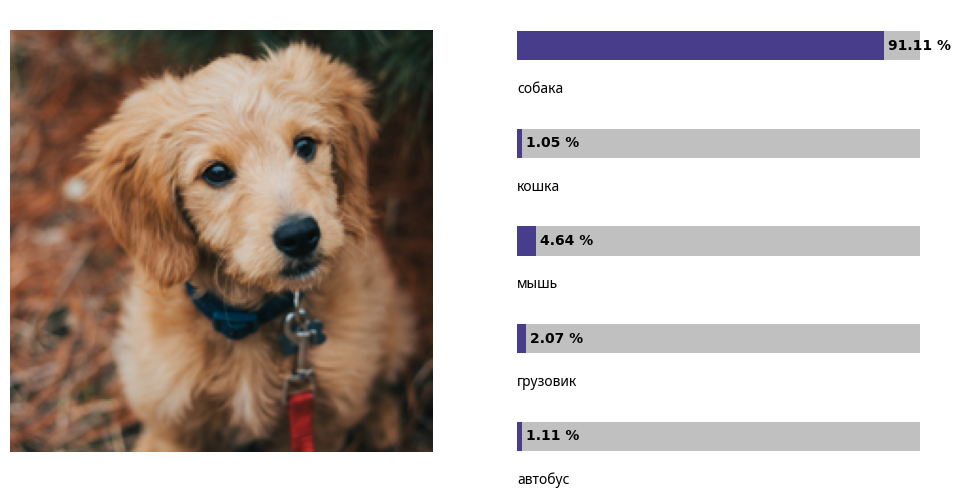

In [13]:
# Russian
texts = [
    "собака",
    "кошка",
    "мышь",
    "грузовик",
    "автобус",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

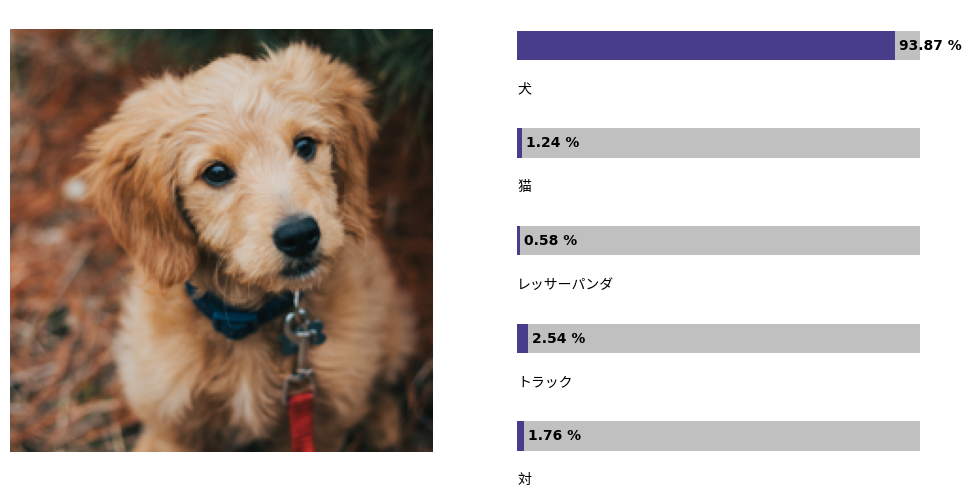

In [14]:
# Japanese
texts = [
    "犬",
    "猫",
    "レッサーパンダ",
    "トラック",
    "対",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="cjk")

/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  func(*args, **kwargs)
/private/home/qduval/.conda/envs/maws/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


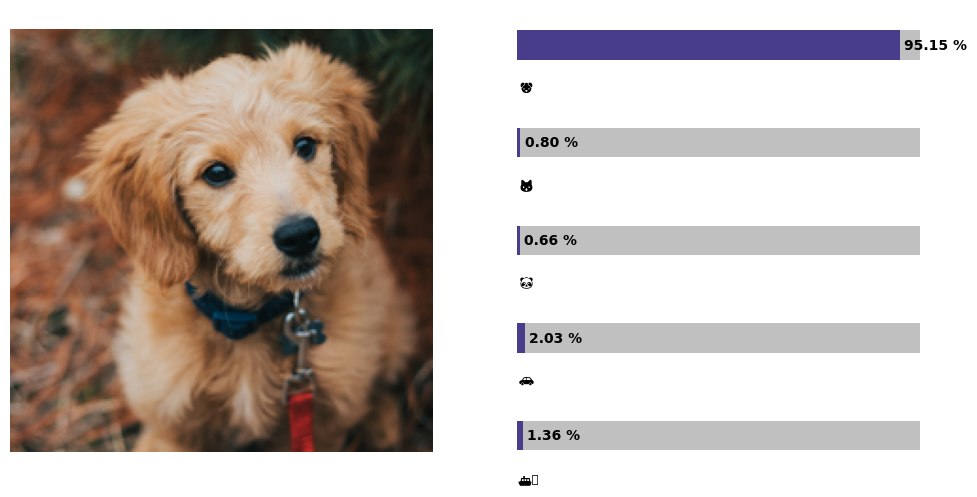

In [15]:
# Emojis 🤩
texts = [
    "🐶",
    "🐱",
    "🐼",
    "🚗",
    "⛴️",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True, lang_type="emoji")

# Example: OCR capabilities

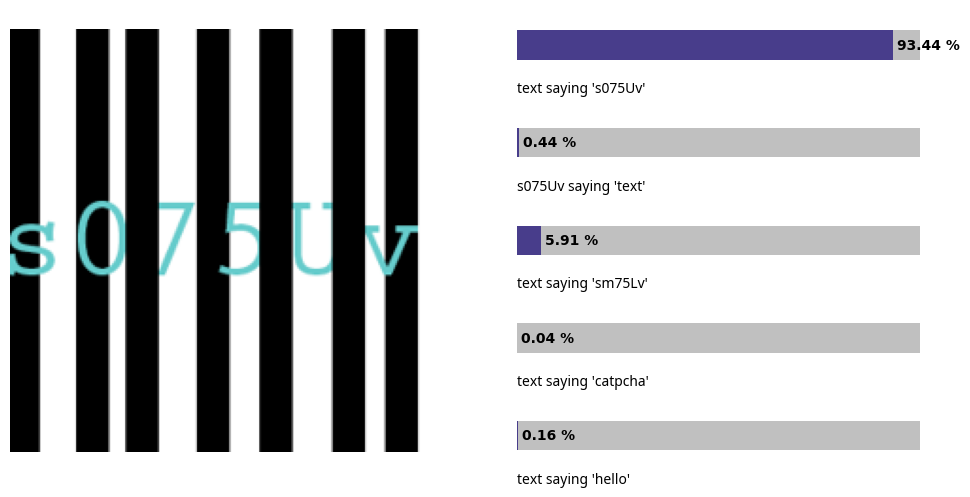

In [16]:
image_path = "https://upload.wikimedia.org/wikipedia/commons/1/18/S075Uv_-_CAPTCHA_images.png"
texts = [
    "text saying 's075Uv'",
    "s075Uv saying 'text'",
    "text saying 'sm75Lv'",
    "text saying 'catpcha'",
    "text saying 'hello'",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

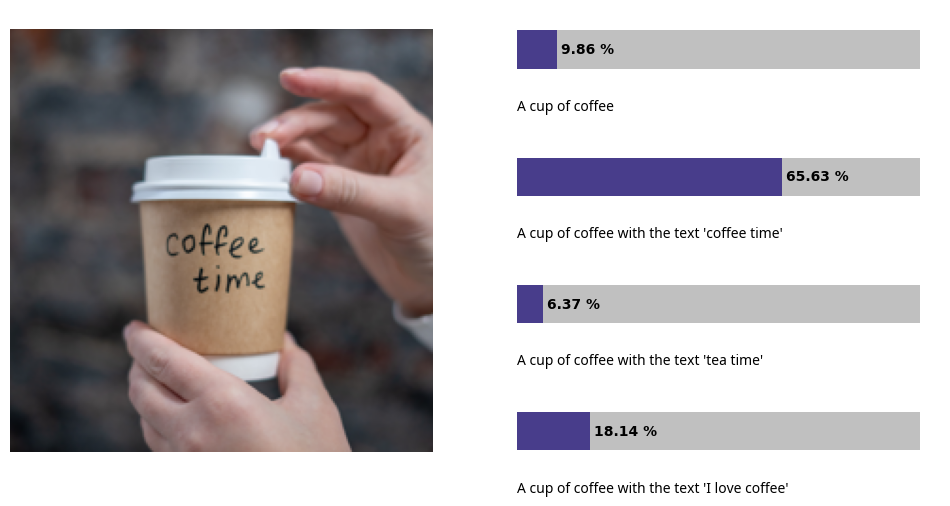

In [17]:
image_path = "https://images.pexels.com/photos/3832260/pexels-photo-3832260.jpeg"
texts = [
    "A cup of coffee",
    "A cup of coffee with the text 'coffee time'",
    "A cup of coffee with the text 'tea time'",
    "A cup of coffee with the text 'I love coffee'",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

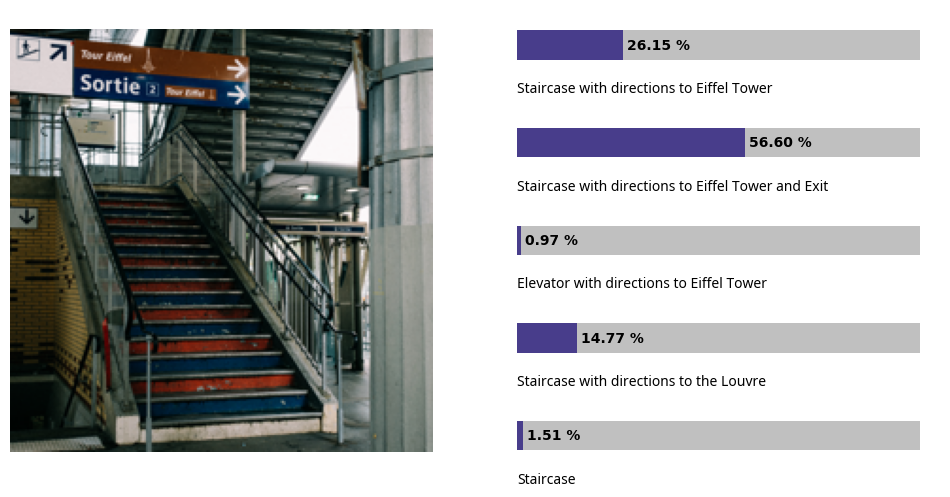

In [18]:
image_path = "https://images.pexels.com/photos/9793510/pexels-photo-9793510.jpeg"
texts = [
    "Staircase with directions to Eiffel Tower",
    "Staircase with directions to Eiffel Tower and Exit",
    "Elevator with directions to Eiffel Tower",
    "Staircase with directions to the Louvre",
    "Staircase",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

# Example: Context understanding

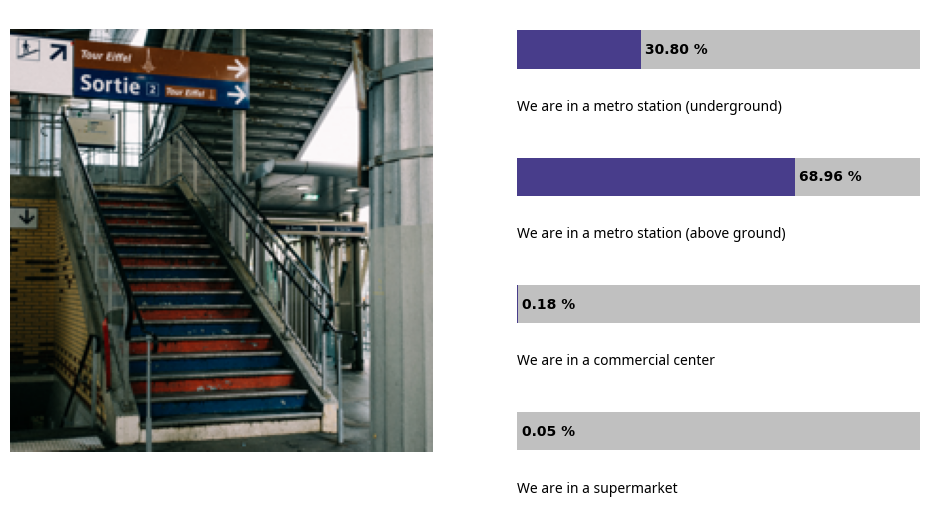

In [19]:
image_path = "https://images.pexels.com/photos/9793510/pexels-photo-9793510.jpeg"
texts = [
    "We are in a metro station (underground)",
    "We are in a metro station (above ground)",
    "We are in a commercial center",
    "We are in a supermarket",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

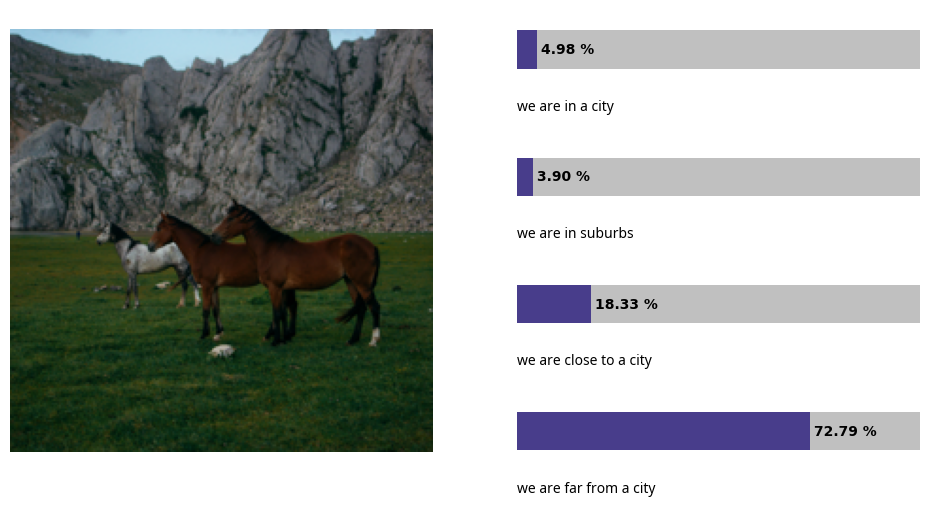

In [20]:
image_path = "https://images.pexels.com/photos/2458400/pexels-photo-2458400.jpeg"
texts = [
    "we are in a city",
    "we are in suburbs",
    "we are close to a city",
    "we are far from a city",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

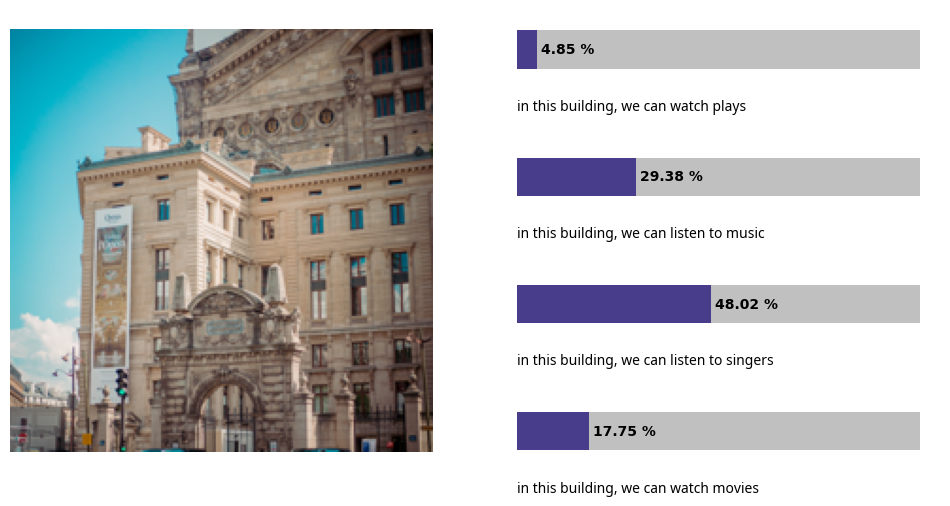

In [21]:
image_path = "https://images.pexels.com/photos/14995900/pexels-photo-14995900/free-photo-of-old-historic-building-against-blue-sky.jpeg"
texts = [
    "in this building, we can watch plays",
    "in this building, we can listen to music",
    "in this building, we can listen to singers",
    "in this building, we can watch movies",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

# Example: Geolocalisation

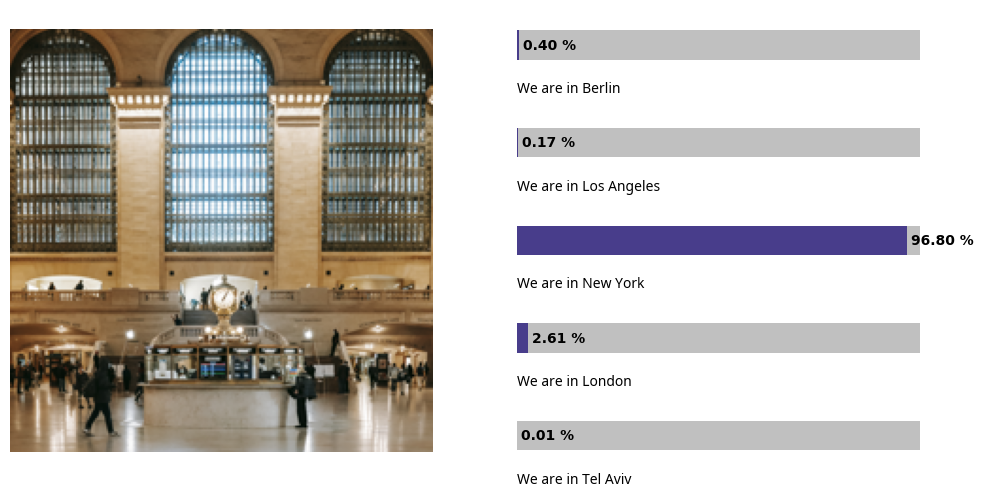

In [22]:
image_path = "https://images.pexels.com/photos/5824817/pexels-photo-5824817.jpeg"
texts = [
    "We are in Berlin",
    "We are in Los Angeles",
    "We are in New York",
    "We are in London",
    "We are in Tel Aviv",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

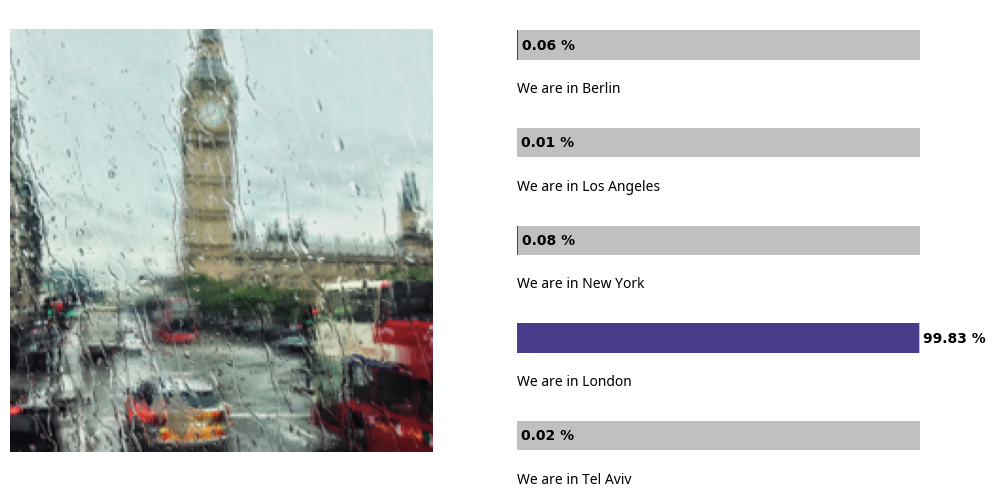

In [23]:
image_path = "https://images.pexels.com/photos/2028885/pexels-photo-2028885.jpeg"
texts = [
    "We are in Berlin",
    "We are in Los Angeles",
    "We are in New York",
    "We are in London",
    "We are in Tel Aviv",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

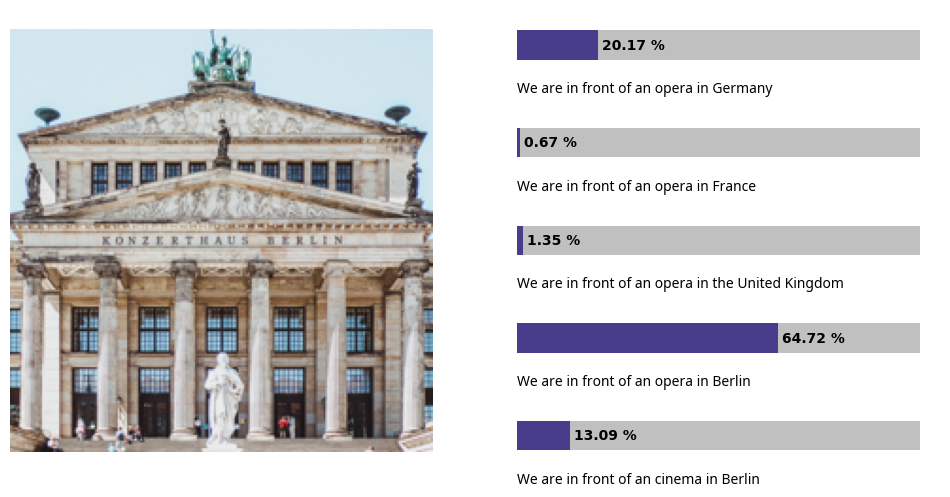

In [24]:
image_path = "https://images.pexels.com/photos/1128424/pexels-photo-1128424.jpeg"
texts = [
    "We are in front of an opera in Germany",
    "We are in front of an opera in France",
    "We are in front of an opera in the United Kingdom",
    "We are in front of an opera in Berlin",
    "We are in front of an cinema in Berlin",
]

predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

# Example: understanding specialized vocabulary

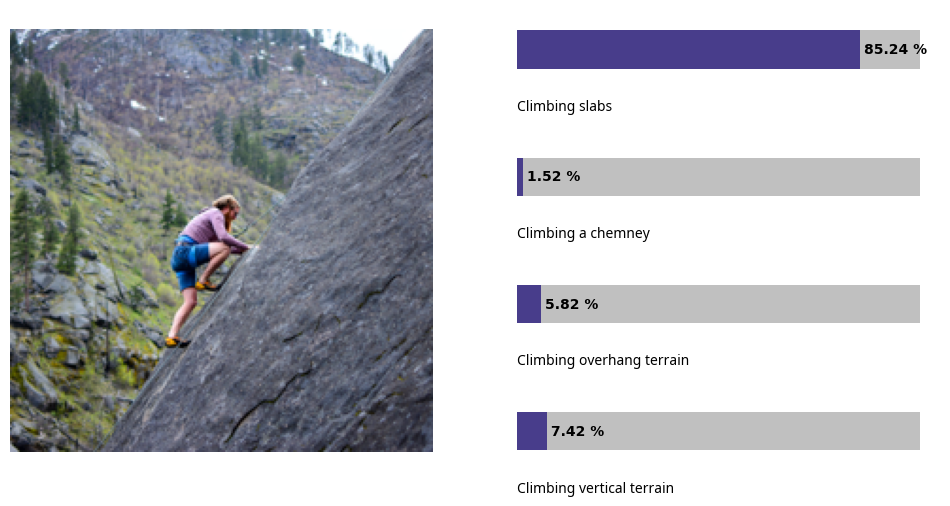

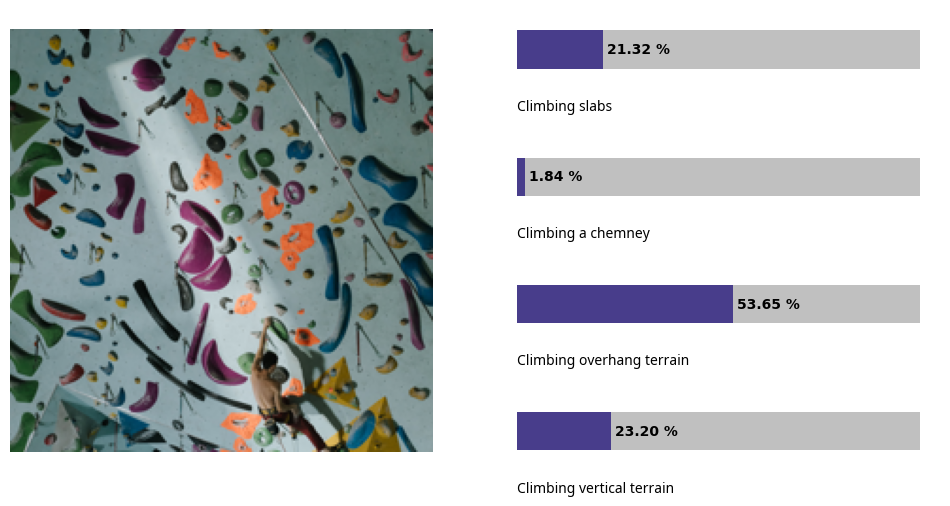

In [25]:
for image_path in [
    "https://images.pexels.com/photos/449609/pexels-photo-449609.jpeg",
    "https://images.pexels.com/photos/6676730/pexels-photo-6676730.jpeg",
]:
    texts = [
        "Climbing slabs",
        "Climbing a chemney",
        "Climbing overhang terrain",
        "Climbing vertical terrain",
    ]
    predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)

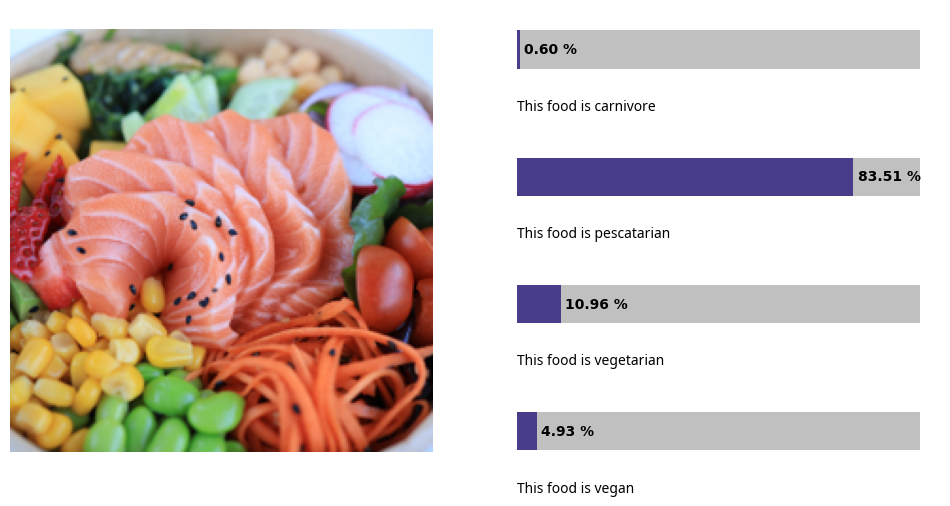

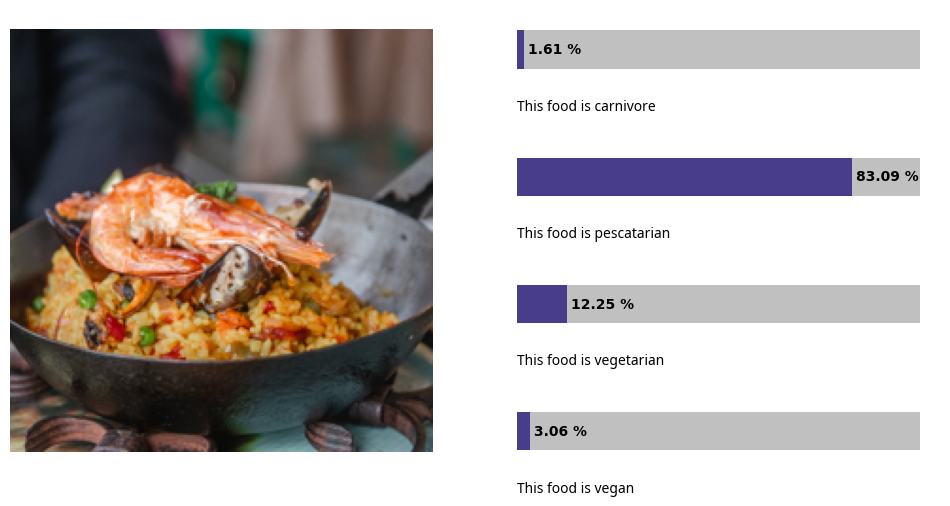

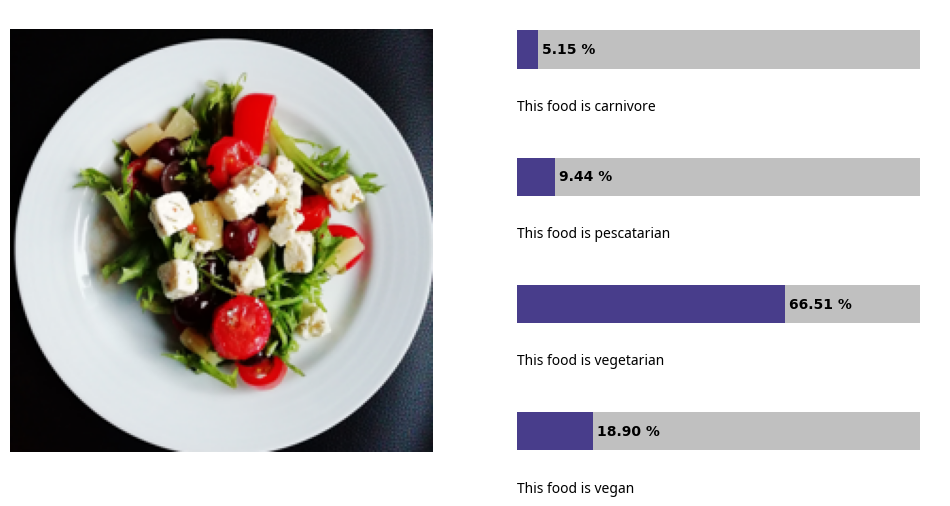

In [26]:
for image_path in [
    "https://images.pexels.com/photos/15913452/pexels-photo-15913452/free-photo-of-poke-bowl-with-salmon.jpeg",
    "https://images.pexels.com/photos/8969237/pexels-photo-8969237.jpeg",
    "https://images.pexels.com/photos/1211887/pexels-photo-1211887.jpeg",
]:
    texts = [
        "This food is carnivore",
        "This food is pescatarian",
        "This food is vegetarian",
        "This food is vegan",
    ]
    predict_probs_and_plot(clip_model, image_path, texts, plot_image=True)